## Support Vector Machine implementation on 220 Band AVIRIS Hyperspectral Image of Indian Pine Test Site 3 

## Steps :
## --> 1. Load Dataset 
## --> 2. Data Preprocessing (Converting from 3D to 2D)
## --> 3. Handling Imbalance Dataset
## --> 4. Feature Extraction (LDA) / Component Selection (16)
## --> 5. Data Cleaning (Removing 0 class) 
## --> 6. Normalization (Z Score Normalization)
## --> 7. Train Test Splitting (70% Train , 30% Test)
## --> 8. Apply Grid search on train dataset and Find best values for hyperparameter
## --> 9. Find Training Accuracy
## --> 10. Testing Accuracy

# 1. Load Dataset

### Import Library

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
%matplotlib inline

### read .lan file

In [73]:
#import the package
from spectral import *

In [74]:
data = open_image('D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3C.lan')

In [75]:
data

	Data Source:   'D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3C.lan'
	# Rows:            145
	# Samples:         145
	# Bands:           220
	Interleave:        BIL
	Quantization:  16 bits
	Data format:     int16

In [76]:
data.shape

(145, 145, 220)

In [77]:
data[:,:,:]

array([[[3172, 4142, 4506, ..., 1020, 1020, 1005],
        [3348, 4266, 4502, ..., 1029, 1020, 1000],
        [3687, 4266, 4421, ..., 1030, 1016, 1009],
        ...,
        [3341, 3890, 4320, ..., 1021, 1015, 1025],
        [3170, 4130, 4320, ..., 1024, 1020, 1011],
        [3172, 3890, 4316, ..., 1034, 1016, 1015]],

       [[3344, 4388, 4334, ..., 1030, 1006, 1015],
        [3515, 4264, 4592, ..., 1039, 1015, 1020],
        [3518, 4268, 4423, ..., 1026, 1015, 1020],
        ...,
        [3859, 4512, 4605, ..., 1035, 1015,  996],
        [3686, 4264, 4690, ..., 1012, 1020, 1014],
        [3512, 4268, 4597, ..., 1019, 1016, 1010]],

       [[3512, 4146, 4416, ..., 1029, 1025, 1010],
        [3344, 4389, 4416, ..., 1021, 1011, 1000],
        [3512, 4273, 4420, ..., 1033, 1010, 1014],
        ...,
        [3341, 4266, 4509, ..., 1025, 1010, 1005],
        [3344, 4262, 4496, ..., 1029, 1020, 1005],
        [3510, 4142, 4230, ..., 1025, 1011, 1010]],

       ...,

       [[3324, 3728, 400

### read ground truth data

In [78]:
ground_truth_data = open_image('D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3GT.GIS').read_band(0)

In [79]:
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

# 2. Data Preprocessing (Converting from 3D to 2D)

### Prepare dataset by making the band number as features and pixel number as rows

In [80]:
dictionary = dict()
value = list()

for z in range(220):
    count = z + 1
    key = 'band_' + str(count)
    
    for x in range(145):
        for y in range(145):
            value.append(data[x,y,z])
    
    dictionary[key] = value
    value = list()
            
dictionary

{'band_1': [3172,
  3348,
  3687,
  3517,
  3514,
  3343,
  3343,
  3343,
  3346,
  3522,
  3858,
  3514,
  3343,
  3343,
  3343,
  3343,
  3343,
  3343,
  3346,
  3514,
  3341,
  3172,
  3343,
  3341,
  3167,
  3004,
  3514,
  3341,
  3170,
  3170,
  3170,
  3167,
  3002,
  3338,
  2996,
  3004,
  3514,
  3343,
  3346,
  3517,
  3517,
  3514,
  3348,
  3687,
  3514,
  3346,
  3514,
  3343,
  3346,
  3514,
  3343,
  3343,
  3343,
  3348,
  3687,
  3511,
  3172,
  3346,
  3514,
  3346,
  3519,
  3690,
  3690,
  3690,
  3693,
  3858,
  3517,
  3517,
  3511,
  3170,
  3175,
  3514,
  3343,
  3343,
  3341,
  3172,
  3341,
  3167,
  2999,
  3170,
  3162,
  2657,
  3170,
  3167,
  3002,
  3341,
  3172,
  3338,
  2999,
  3170,
  3167,
  2996,
  2999,
  3167,
  3002,
  3341,
  3178,
  3690,
  3687,
  3517,
  3517,
  3514,
  3343,
  3346,
  3511,
  3175,
  3514,
  3343,
  3343,
  3343,
  3341,
  3172,
  3343,
  3346,
  3511,
  3172,
  3341,
  3170,
  3178,
  3685,
  3343,
  3341,
  3175,
  3517

In [81]:
dictionary['band_1']

[3172,
 3348,
 3687,
 3517,
 3514,
 3343,
 3343,
 3343,
 3346,
 3522,
 3858,
 3514,
 3343,
 3343,
 3343,
 3343,
 3343,
 3343,
 3346,
 3514,
 3341,
 3172,
 3343,
 3341,
 3167,
 3004,
 3514,
 3341,
 3170,
 3170,
 3170,
 3167,
 3002,
 3338,
 2996,
 3004,
 3514,
 3343,
 3346,
 3517,
 3517,
 3514,
 3348,
 3687,
 3514,
 3346,
 3514,
 3343,
 3346,
 3514,
 3343,
 3343,
 3343,
 3348,
 3687,
 3511,
 3172,
 3346,
 3514,
 3346,
 3519,
 3690,
 3690,
 3690,
 3693,
 3858,
 3517,
 3517,
 3511,
 3170,
 3175,
 3514,
 3343,
 3343,
 3341,
 3172,
 3341,
 3167,
 2999,
 3170,
 3162,
 2657,
 3170,
 3167,
 3002,
 3341,
 3172,
 3338,
 2999,
 3170,
 3167,
 2996,
 2999,
 3167,
 3002,
 3341,
 3178,
 3690,
 3687,
 3517,
 3517,
 3514,
 3343,
 3346,
 3511,
 3175,
 3514,
 3343,
 3343,
 3343,
 3341,
 3172,
 3343,
 3346,
 3511,
 3172,
 3341,
 3170,
 3178,
 3685,
 3343,
 3341,
 3175,
 3517,
 3517,
 3517,
 3517,
 3519,
 3690,
 3693,
 3858,
 3519,
 3687,
 3522,
 3861,
 3687,
 3517,
 3514,
 3346,
 3514,
 3338,
 3002,
 3341,

### Prepare ground truth data as target data

In [82]:
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [83]:
ground_truth_data.shape

(145, 145)

In [84]:
# number of unique values and their count

diff = dict()

for i in range(145):
    for j in range(145):
        if ground_truth_data[i,j] not in diff:
            diff[ground_truth_data[i,j]] = 1
        else:
            diff[ground_truth_data[i,j]] = diff[ground_truth_data[i,j]] + 1
diff

{3: 834,
 0: 10659,
 15: 380,
 11: 2468,
 12: 614,
 5: 497,
 10: 968,
 14: 1294,
 16: 95,
 2: 1434,
 4: 234,
 8: 489,
 6: 747,
 9: 20,
 1: 54,
 7: 26,
 13: 212}

NB : So there are total 17 classes in this ground truth data

In [85]:
target = ground_truth_data.reshape(21025,)
target

array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [86]:
print(target.shape)
print(target.ndim)

(21025,)
1


### making df

In [87]:
df = pd.DataFrame(dictionary)

In [88]:
df

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0        3172    4142    4506    4279    4782    5048    5213    5106    5053   
1        3348    4266    4502    4426    4853    5249    5352    5353    5347   
2        3687    4266    4421    4498    5019    5293    5438    5427    5383   
3        3517    4258    4603    4493    4958    5234    5417    5355    5349   
4        3514    4018    4675    4417    4886    5117    5215    5096    5098   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
21020    3329    3987    4011    4023    4201    4377    4418    4248    4180   
21021    3494    4104    4024    3880    4210    4377    4413    4174    4229   
21022    3153    3864    4282    3889    4310    4372    4375    4208    4096   
21023    3155    4104    4109    4027    4139    4318    4413    4174    4140   
21024    3323    3860    4197    3952    4148    4279    4375    4225    3988   

       band_10  ...  band_211  band_212  band_213  band_214  band_215  \
0         4750  ...      1094      1090      1112      1090      1062   
1         5065  ...      1108      1104      1117      1091      1079   
2         5132  ...      1111      1114      1114      1100      1065   
3         5096  ...      1122      1108      1109      1109      1071   
4         4834  ...      1110      1107      1112      1094      1072   
...        ...  ...       ...       ...       ...       ...       ...   
21020     3838  ...      1013      1012      1018      1015      1011   
21021     3900  ...      1012      1014      1012      1024       998   
21022     3878  ...      1016      1015      1016      1021      1008   
21023     3933  ...      1005      1011      1008      1012      1014   
21024     3866  ...      1018      1014      1007      1015      1002   

       band_216  band_217  band_218  band_219  band_220  
0          1069      1057      1020      1020      1005  
1          1085      1064      1029      1020      1000  
2          1092      1061      1030      1016      1009  
3          1088      1060      1030      1006      1005  
4          1087      1052      1034      1019      1019  
...         ...       ...       ...       ...       ...  
21020      1001      1000      1009      1008      1009  
21021      1010      1006      1000      1000      1004  
21022      1019      1003      1008      1000      1009  
21023      1007      1011      1005      1003      1004  
21024      1010      1007      1004      1000      1000  

[21025 rows x 220 columns]

In [89]:
target


array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [90]:
target.shape


(21025,)

In [91]:
df['target'] = target
df


band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0        3172    4142    4506    4279    4782    5048    5213    5106    5053   
1        3348    4266    4502    4426    4853    5249    5352    5353    5347   
2        3687    4266    4421    4498    5019    5293    5438    5427    5383   
3        3517    4258    4603    4493    4958    5234    5417    5355    5349   
4        3514    4018    4675    4417    4886    5117    5215    5096    5098   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
21020    3329    3987    4011    4023    4201    4377    4418    4248    4180   
21021    3494    4104    4024    3880    4210    4377    4413    4174    4229   
21022    3153    3864    4282    3889    4310    4372    4375    4208    4096   
21023    3155    4104    4109    4027    4139    4318    4413    4174    4140   
21024    3323    3860    4197    3952    4148    4279    4375    4225    3988   

       band_10  ...  band_212  band_213  band_214  band_215  band_216  \
0         4750  ...      1090      1112      1090      1062      1069   
1         5065  ...      1104      1117      1091      1079      1085   
2         5132  ...      1114      1114      1100      1065      1092   
3         5096  ...      1108      1109      1109      1071      1088   
4         4834  ...      1107      1112      1094      1072      1087   
...        ...  ...       ...       ...       ...       ...       ...   
21020     3838  ...      1012      1018      1015      1011      1001   
21021     3900  ...      1014      1012      1024       998      1010   
21022     3878  ...      1015      1016      1021      1008      1019   
21023     3933  ...      1011      1008      1012      1014      1007   
21024     3866  ...      1014      1007      1015      1002      1010   

       band_217  band_218  band_219  band_220  target  
0          1057      1020      1020      1005       3  
1          1064      1029      1020      1000       3  
2          1061      1030      1016      1009       3  
3          1060      1030      1006      1005       3  
4          1052      1034      1019      1019       3  
...         ...       ...       ...       ...     ...  
21020      1000      1009      1008      1009       0  
21021      1006      1000      1000      1004       0  
21022      1003      1008      1000      1009       0  
21023      1011      1005      1003      1004       0  
21024      1007      1004      1000      1000       0  

[21025 rows x 221 columns]

# 3. Handling Imbalance Dataset

In [92]:
df['target'].value_counts()


0     10659
11     2468
2      1434
14     1294
10      968
3       834
6       747
12      614
5       497
8       489
15      380
4       234
13      212
16       95
1        54
7        26
9        20
Name: target, dtype: int64

from here it is clear that class no 16 , 1 , 7 and 9 have less number of samples.

In [93]:
total = df['target'].value_counts().sum() - df['target'].value_counts()[0]
total

10366

In [94]:
# total number of extra data
num_of_data_to_be_added = 20000
num_of_data_to_be_added


20000

### functions to generate synthetic samples

In [95]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors


def generate_synthetic_samples(original_samples, num_samples_to_generate, k_neighbors=5):
    # Create a Nearest Neighbors model
    nn_model = NearestNeighbors(n_neighbors=k_neighbors)
    nn_model.fit(original_samples)

    synthetic_samples = []

    while len(synthetic_samples) < num_samples_to_generate:
        # Choose a random sample from the minority class
        random_sample_idx = np.random.randint(0, len(original_samples))
        random_sample = original_samples[random_sample_idx]

        # Find the k nearest neighbors of the random sample
        _, neighbors_idx = nn_model.kneighbors(
            [random_sample], n_neighbors=k_neighbors)
        neighbors = original_samples[neighbors_idx[0]]

        # Calculate the mean feature values of neighbors
        mean_features = np.mean(neighbors, axis=0)

        # Create a synthetic sample using feature interpolation
        synthetic_sample = random_sample + \
            np.random.uniform(-0.5, 0.5) * (mean_features - random_sample)
        synthetic_samples.append(synthetic_sample)

    return np.array(synthetic_samples)


In [96]:
names = []
st = 'band_'
for i in range(220):
    names.append(st+str(i+1))

for i in range(1,17):
    original_samples_class_i = df[df['target'] == i].drop('target', axis=1)
    num_samples_to_generate_class_i = int( len(original_samples_class_i) * num_of_data_to_be_added / total)
    synthetic_samples_class_i = generate_synthetic_samples(original_samples_class_i.values, num_samples_to_generate_class_i)
    synthetic_samples_class_i = pd.DataFrame(data=synthetic_samples_class_i, columns=names)
    synthetic_samples_class_i['target'] = i
    df = df.append(synthetic_samples_class_i, ignore_index=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15448\3365882927.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(synthetic_samples_class_i, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_15448\3365882927.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(synthetic_samples_class_i, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_15448\3365882927.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(synthetic_samples_class_i, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_15448\3365882927.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(sy

### Final df

In [97]:
df


band_1       band_2       band_3       band_4       band_5  \
0      3172.000000  4142.000000  4506.000000  4279.000000  4782.000000   
1      3348.000000  4266.000000  4502.000000  4426.000000  4853.000000   
2      3687.000000  4266.000000  4421.000000  4498.000000  5019.000000   
3      3517.000000  4258.000000  4603.000000  4493.000000  4958.000000   
4      3514.000000  4018.000000  4675.000000  4417.000000  4886.000000   
...            ...          ...          ...          ...          ...   
41013  3860.485510  4900.236444  5261.486581  5412.276975  5820.639559   
41014  4044.578016  5199.362533  5342.375825  5390.845943  5885.388442   
41015  4008.148340  5009.634630  5253.461567  5128.652385  5763.419649   
41016  3613.160214  4946.396560  5278.264868  5072.291314  5853.486629   
41017  4272.567872  4790.138346  5330.425746  5322.825545  5969.032414   

            band_6       band_7       band_8       band_9      band_10  ...  \
0      5048.000000  5213.000000  5106.000000  5053.000000  4750.000000  ...   
1      5249.000000  5352.000000  5353.000000  5347.000000  5065.000000  ...   
2      5293.000000  5438.000000  5427.000000  5383.000000  5132.000000  ...   
3      5234.000000  5417.000000  5355.000000  5349.000000  5096.000000  ...   
4      5117.000000  5215.000000  5096.000000  5098.000000  4834.000000  ...   
...            ...          ...          ...          ...          ...  ...   
41013  6321.911699  6640.815350  6556.944443  6557.792537  6368.450885  ...   
41014  6448.545148  6665.288177  6609.341295  6503.979750  6373.637780  ...   
41015  6273.880008  6501.585464  6421.480249  6538.943024  6242.880008  ...   
41016  6340.842158  6373.512778  6442.087103  6490.797865  6198.132582  ...   
41017  6460.083764  6705.430827  6644.559936  6709.819541  6426.565940  ...   

          band_212     band_213     band_214     band_215     band_216  \
0      1090.000000  1112.000000  1090.000000  1062.000000  1069.000000   
1      1104.000000  1117.000000  1091.000000  1079.000000  1085.000000   
2      1114.000000  1114.000000  1100.000000  1065.000000  1092.000000   
3      1108.000000  1109.000000  1109.000000  1071.000000  1088.000000   
4      1107.000000  1112.000000  1094.000000  1072.000000  1087.000000   
...            ...          ...          ...          ...          ...   
41013  1107.446860  1099.119163  1077.009930  1052.682233  1062.900698   
41014  1070.360559  1081.449868  1059.899735  1050.989044  1045.090970   
41015  1079.694302  1081.952970  1061.423274  1052.905939  1054.188122   
41016  1060.400119  1065.178061  1065.577587  1030.266943  1046.955707   
41017  1082.043960  1094.565017  1073.173993  1054.174455  1059.608977   

          band_217     band_218     band_219     band_220  target  
0      1057.000000  1020.000000  1020.000000  1005.000000       3  
1      1064.000000  1029.000000  1020.000000  1000.000000       3  
2      1061.000000  1030.000000  1016.000000  1009.000000       3  
3      1060.000000  1030.000000  1006.000000  1005.000000       3  
4      1052.000000  1034.000000  1019.000000  1019.000000       3  
...            ...          ...          ...          ...     ...  
41013  1044.940419  1028.059581  1014.089372  1015.188674      16  
41014  1034.921647  1026.010956  1010.000000   996.899735      16  
41015  1040.858909  1016.164606  1005.611395  1000.705456      16  
41016  1029.422413  1010.400119  1004.200059  1003.466706      16  
41017  1037.782970  1020.826007  1005.217492  1014.217492      16  

[41018 rows x 221 columns]

In [98]:
df['target'].value_counts()


0     10659
11     7229
2      4200
14     3790
10     2835
3      2443
6      2188
12     1798
5      1455
8      1432
15     1113
4       685
13      621
16      278
1       158
7        76
9        58
Name: target, dtype: int64

In [99]:
# df = df.sample(frac=1, random_state=np.random.seed())
# df


In [100]:
target = df['target']
target

0         3
1         3
2         3
3         3
4         3
         ..
41013    16
41014    16
41015    16
41016    16
41017    16
Name: target, Length: 41018, dtype: int64

In [101]:
df = df.drop('target',axis=1)
df

band_1       band_2       band_3       band_4       band_5  \
0      3172.000000  4142.000000  4506.000000  4279.000000  4782.000000   
1      3348.000000  4266.000000  4502.000000  4426.000000  4853.000000   
2      3687.000000  4266.000000  4421.000000  4498.000000  5019.000000   
3      3517.000000  4258.000000  4603.000000  4493.000000  4958.000000   
4      3514.000000  4018.000000  4675.000000  4417.000000  4886.000000   
...            ...          ...          ...          ...          ...   
41013  3860.485510  4900.236444  5261.486581  5412.276975  5820.639559   
41014  4044.578016  5199.362533  5342.375825  5390.845943  5885.388442   
41015  4008.148340  5009.634630  5253.461567  5128.652385  5763.419649   
41016  3613.160214  4946.396560  5278.264868  5072.291314  5853.486629   
41017  4272.567872  4790.138346  5330.425746  5322.825545  5969.032414   

            band_6       band_7       band_8       band_9      band_10  ...  \
0      5048.000000  5213.000000  5106.000000  5053.000000  4750.000000  ...   
1      5249.000000  5352.000000  5353.000000  5347.000000  5065.000000  ...   
2      5293.000000  5438.000000  5427.000000  5383.000000  5132.000000  ...   
3      5234.000000  5417.000000  5355.000000  5349.000000  5096.000000  ...   
4      5117.000000  5215.000000  5096.000000  5098.000000  4834.000000  ...   
...            ...          ...          ...          ...          ...  ...   
41013  6321.911699  6640.815350  6556.944443  6557.792537  6368.450885  ...   
41014  6448.545148  6665.288177  6609.341295  6503.979750  6373.637780  ...   
41015  6273.880008  6501.585464  6421.480249  6538.943024  6242.880008  ...   
41016  6340.842158  6373.512778  6442.087103  6490.797865  6198.132582  ...   
41017  6460.083764  6705.430827  6644.559936  6709.819541  6426.565940  ...   

          band_211     band_212     band_213     band_214     band_215  \
0      1094.000000  1090.000000  1112.000000  1090.000000  1062.000000   
1      1108.000000  1104.000000  1117.000000  1091.000000  1079.000000   
2      1111.000000  1114.000000  1114.000000  1100.000000  1065.000000   
3      1122.000000  1108.000000  1109.000000  1109.000000  1071.000000   
4      1110.000000  1107.000000  1112.000000  1094.000000  1072.000000   
...            ...          ...          ...          ...          ...   
41013  1101.228395  1107.446860  1099.119163  1077.009930  1052.682233   
41014  1090.471779  1070.360559  1081.449868  1059.899735  1050.989044   
41015  1086.506181  1079.694302  1081.952970  1061.423274  1052.905939   
41016  1071.177765  1060.400119  1065.178061  1065.577587  1030.266943   
41017  1089.087459  1082.043960  1094.565017  1073.173993  1054.174455   

          band_216     band_217     band_218     band_219     band_220  
0      1069.000000  1057.000000  1020.000000  1020.000000  1005.000000  
1      1085.000000  1064.000000  1029.000000  1020.000000  1000.000000  
2      1092.000000  1061.000000  1030.000000  1016.000000  1009.000000  
3      1088.000000  1060.000000  1030.000000  1006.000000  1005.000000  
4      1087.000000  1052.000000  1034.000000  1019.000000  1019.000000  
...            ...          ...          ...          ...          ...  
41013  1062.900698  1044.940419  1028.059581  1014.089372  1015.188674  
41014  1045.090970  1034.921647  1026.010956  1010.000000   996.899735  
41015  1054.188122  1040.858909  1016.164606  1005.611395  1000.705456  
41016  1046.955707  1029.422413  1010.400119  1004.200059  1003.466706  
41017  1059.608977  1037.782970  1020.826007  1005.217492  1014.217492  

[41018 rows x 220 columns]

# 4. Feature Extraction (PCA) / Component Selection

In [104]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=16)
x_lda = lda.fit_transform(df,target)
x_lda

# from sklearn.decomposition import PCA
# pca = PCA(n_components=16)
# pca.fit(df)
# x_pca = pca.transform(df)
# x_pca

array([[ 2.12902137,  0.4639177 , -1.05833487, ..., -2.46036586,
         0.96690337,  0.34249315],
       [ 2.16712704,  0.64409467, -0.77765458, ..., -0.98555952,
        -1.1283033 , -0.63910914],
       [ 2.16970913,  1.77505825, -1.20202387, ...,  1.44727434,
         0.6014865 , -0.18935027],
       ...,
       [-1.84418472,  1.23225787, -2.08604481, ...,  0.828885  ,
        -1.54777523,  1.62662576],
       [-3.13298614, -0.174921  , -2.87945434, ..., -0.46259442,
         0.19191097, -0.91935956],
       [-2.14732818,  0.39919411, -2.31462632, ..., -0.53254012,
         0.73392392,  0.66515021]])

In [105]:
lda.explained_variance_ratio_

array([0.35874647, 0.22685515, 0.09062796, 0.07293444, 0.06250399,
       0.05222021, 0.04172774, 0.03254623, 0.01945349, 0.01165555,
       0.00919524, 0.00774663, 0.00527094, 0.00353237, 0.00271731,
       0.00226629])

In [106]:
cumulative_variance = np.cumsum(lda.explained_variance_ratio_)
cumulative_variance

array([0.35874647, 0.58560162, 0.67622958, 0.74916402, 0.81166801,
       0.86388821, 0.90561595, 0.93816218, 0.95761566, 0.96927122,
       0.97846645, 0.98621308, 0.99148402, 0.9950164 , 0.99773371,
       1.        ])

In [107]:
print(df.shape)
print(x_lda.shape)

(41018, 220)
(41018, 16)


In [108]:
pd.DataFrame(data=x_lda)

0         1         2          3         4         5         6   \
0      2.129021  0.463918 -1.058335  -0.259862 -1.174503  2.504377  0.080398   
1      2.167127  0.644095 -0.777655  -0.294339 -0.223340  3.017268 -0.264380   
2      2.169709  1.775058 -1.202024  -0.129884 -0.992628  2.839786  0.609734   
3      1.986114  1.732293 -1.215825  -1.098789 -1.385123  2.483051  0.947762   
4      2.151866  0.394841 -0.817692   0.232878 -0.783657  1.935019  0.254626   
...         ...       ...       ...        ...       ...       ...       ...   
41013 -1.255941  2.163339 -1.266574 -12.893027  1.372389 -0.260702  0.890917   
41014 -2.630963  1.252066 -1.901921 -12.427281 -0.513669 -0.455026 -0.664544   
41015 -1.844185  1.232258 -2.086045 -11.868266 -0.060740 -1.430995  1.794626   
41016 -3.132986 -0.174921 -2.879454 -12.043436  0.494837 -0.531785  2.368131   
41017 -2.147328  0.399194 -2.314626 -12.255213  0.401696 -0.930903 -0.384272   

             7         8         9         10        11        12        13  \
0      0.443885  0.002689 -0.193089  1.436284  0.675721  1.404473 -2.460366   
1      0.462687  0.266509 -0.303804 -0.069667  1.829611  1.369672 -0.985560   
2      0.591089  1.947675 -0.684716 -0.311591  1.688451  0.187410  1.447274   
3      0.769968  1.791835 -1.648570 -1.107555  1.827821 -0.199097  0.360937   
4      1.217494  0.004896 -1.811156 -1.275252  1.081702 -1.124693  1.162726   
...         ...       ...       ...       ...       ...       ...       ...   
41013 -3.719892 -0.436323 -2.384619 -3.641481  0.228757 -1.018657 -0.664533   
41014 -3.568237  0.070670 -0.085426 -1.541406  1.954856  0.496293  0.762853   
41015 -2.066891 -0.573417  0.197115 -0.406841  1.354617 -1.252769  0.828885   
41016  1.298076 -2.913479  0.819580  0.926164  0.651061  3.779513 -0.462594   
41017 -2.956546 -0.978730 -2.122810 -0.923591  0.727485  1.024090 -0.532540   

             14        15  
0      0.966903  0.342493  
1     -1.128303 -0.639109  
2      0.601486 -0.189350  
3      0.722040 -1.341799  
4      0.696136 -0.772924  
...         ...       ...  
41013  1.458906 -0.772020  
41014 -3.453261 -0.539002  
41015 -1.547775  1.626626  
41016  0.191911 -0.919360  
41017  0.733924  0.665150  

[41018 rows x 16 columns]

In [109]:
df = pd.DataFrame(data=x_lda)
df

0         1         2          3         4         5         6   \
0      2.129021  0.463918 -1.058335  -0.259862 -1.174503  2.504377  0.080398   
1      2.167127  0.644095 -0.777655  -0.294339 -0.223340  3.017268 -0.264380   
2      2.169709  1.775058 -1.202024  -0.129884 -0.992628  2.839786  0.609734   
3      1.986114  1.732293 -1.215825  -1.098789 -1.385123  2.483051  0.947762   
4      2.151866  0.394841 -0.817692   0.232878 -0.783657  1.935019  0.254626   
...         ...       ...       ...        ...       ...       ...       ...   
41013 -1.255941  2.163339 -1.266574 -12.893027  1.372389 -0.260702  0.890917   
41014 -2.630963  1.252066 -1.901921 -12.427281 -0.513669 -0.455026 -0.664544   
41015 -1.844185  1.232258 -2.086045 -11.868266 -0.060740 -1.430995  1.794626   
41016 -3.132986 -0.174921 -2.879454 -12.043436  0.494837 -0.531785  2.368131   
41017 -2.147328  0.399194 -2.314626 -12.255213  0.401696 -0.930903 -0.384272   

             7         8         9         10        11        12        13  \
0      0.443885  0.002689 -0.193089  1.436284  0.675721  1.404473 -2.460366   
1      0.462687  0.266509 -0.303804 -0.069667  1.829611  1.369672 -0.985560   
2      0.591089  1.947675 -0.684716 -0.311591  1.688451  0.187410  1.447274   
3      0.769968  1.791835 -1.648570 -1.107555  1.827821 -0.199097  0.360937   
4      1.217494  0.004896 -1.811156 -1.275252  1.081702 -1.124693  1.162726   
...         ...       ...       ...       ...       ...       ...       ...   
41013 -3.719892 -0.436323 -2.384619 -3.641481  0.228757 -1.018657 -0.664533   
41014 -3.568237  0.070670 -0.085426 -1.541406  1.954856  0.496293  0.762853   
41015 -2.066891 -0.573417  0.197115 -0.406841  1.354617 -1.252769  0.828885   
41016  1.298076 -2.913479  0.819580  0.926164  0.651061  3.779513 -0.462594   
41017 -2.956546 -0.978730 -2.122810 -0.923591  0.727485  1.024090 -0.532540   

             14        15  
0      0.966903  0.342493  
1     -1.128303 -0.639109  
2      0.601486 -0.189350  
3      0.722040 -1.341799  
4      0.696136 -0.772924  
...         ...       ...  
41013  1.458906 -0.772020  
41014 -3.453261 -0.539002  
41015 -1.547775  1.626626  
41016  0.191911 -0.919360  
41017  0.733924  0.665150  

[41018 rows x 16 columns]

In [110]:
target

0         3
1         3
2         3
3         3
4         3
         ..
41013    16
41014    16
41015    16
41016    16
41017    16
Name: target, Length: 41018, dtype: int64

In [111]:
target.shape

(41018,)

In [112]:
df['target'] = target
df

0         1         2          3         4         5         6  \
0      2.129021  0.463918 -1.058335  -0.259862 -1.174503  2.504377  0.080398   
1      2.167127  0.644095 -0.777655  -0.294339 -0.223340  3.017268 -0.264380   
2      2.169709  1.775058 -1.202024  -0.129884 -0.992628  2.839786  0.609734   
3      1.986114  1.732293 -1.215825  -1.098789 -1.385123  2.483051  0.947762   
4      2.151866  0.394841 -0.817692   0.232878 -0.783657  1.935019  0.254626   
...         ...       ...       ...        ...       ...       ...       ...   
41013 -1.255941  2.163339 -1.266574 -12.893027  1.372389 -0.260702  0.890917   
41014 -2.630963  1.252066 -1.901921 -12.427281 -0.513669 -0.455026 -0.664544   
41015 -1.844185  1.232258 -2.086045 -11.868266 -0.060740 -1.430995  1.794626   
41016 -3.132986 -0.174921 -2.879454 -12.043436  0.494837 -0.531785  2.368131   
41017 -2.147328  0.399194 -2.314626 -12.255213  0.401696 -0.930903 -0.384272   

              7         8         9        10        11        12        13  \
0      0.443885  0.002689 -0.193089  1.436284  0.675721  1.404473 -2.460366   
1      0.462687  0.266509 -0.303804 -0.069667  1.829611  1.369672 -0.985560   
2      0.591089  1.947675 -0.684716 -0.311591  1.688451  0.187410  1.447274   
3      0.769968  1.791835 -1.648570 -1.107555  1.827821 -0.199097  0.360937   
4      1.217494  0.004896 -1.811156 -1.275252  1.081702 -1.124693  1.162726   
...         ...       ...       ...       ...       ...       ...       ...   
41013 -3.719892 -0.436323 -2.384619 -3.641481  0.228757 -1.018657 -0.664533   
41014 -3.568237  0.070670 -0.085426 -1.541406  1.954856  0.496293  0.762853   
41015 -2.066891 -0.573417  0.197115 -0.406841  1.354617 -1.252769  0.828885   
41016  1.298076 -2.913479  0.819580  0.926164  0.651061  3.779513 -0.462594   
41017 -2.956546 -0.978730 -2.122810 -0.923591  0.727485  1.024090 -0.532540   

             14        15  target  
0      0.966903  0.342493       3  
1     -1.128303 -0.639109       3  
2      0.601486 -0.189350       3  
3      0.722040 -1.341799       3  
4      0.696136 -0.772924       3  
...         ...       ...     ...  
41013  1.458906 -0.772020      16  
41014 -3.453261 -0.539002      16  
41015 -1.547775  1.626626      16  
41016  0.191911 -0.919360      16  
41017  0.733924  0.665150      16  

[41018 rows x 17 columns]

# 5. Data Cleaning (Removing 0 class) 

In [113]:
df = df[df['target']!=0]

In [114]:
df

0         1         2          3         4         5         6  \
0      2.129021  0.463918 -1.058335  -0.259862 -1.174503  2.504377  0.080398   
1      2.167127  0.644095 -0.777655  -0.294339 -0.223340  3.017268 -0.264380   
2      2.169709  1.775058 -1.202024  -0.129884 -0.992628  2.839786  0.609734   
3      1.986114  1.732293 -1.215825  -1.098789 -1.385123  2.483051  0.947762   
4      2.151866  0.394841 -0.817692   0.232878 -0.783657  1.935019  0.254626   
...         ...       ...       ...        ...       ...       ...       ...   
41013 -1.255941  2.163339 -1.266574 -12.893027  1.372389 -0.260702  0.890917   
41014 -2.630963  1.252066 -1.901921 -12.427281 -0.513669 -0.455026 -0.664544   
41015 -1.844185  1.232258 -2.086045 -11.868266 -0.060740 -1.430995  1.794626   
41016 -3.132986 -0.174921 -2.879454 -12.043436  0.494837 -0.531785  2.368131   
41017 -2.147328  0.399194 -2.314626 -12.255213  0.401696 -0.930903 -0.384272   

              7         8         9        10        11        12        13  \
0      0.443885  0.002689 -0.193089  1.436284  0.675721  1.404473 -2.460366   
1      0.462687  0.266509 -0.303804 -0.069667  1.829611  1.369672 -0.985560   
2      0.591089  1.947675 -0.684716 -0.311591  1.688451  0.187410  1.447274   
3      0.769968  1.791835 -1.648570 -1.107555  1.827821 -0.199097  0.360937   
4      1.217494  0.004896 -1.811156 -1.275252  1.081702 -1.124693  1.162726   
...         ...       ...       ...       ...       ...       ...       ...   
41013 -3.719892 -0.436323 -2.384619 -3.641481  0.228757 -1.018657 -0.664533   
41014 -3.568237  0.070670 -0.085426 -1.541406  1.954856  0.496293  0.762853   
41015 -2.066891 -0.573417  0.197115 -0.406841  1.354617 -1.252769  0.828885   
41016  1.298076 -2.913479  0.819580  0.926164  0.651061  3.779513 -0.462594   
41017 -2.956546 -0.978730 -2.122810 -0.923591  0.727485  1.024090 -0.532540   

             14        15  target  
0      0.966903  0.342493       3  
1     -1.128303 -0.639109       3  
2      0.601486 -0.189350       3  
3      0.722040 -1.341799       3  
4      0.696136 -0.772924       3  
...         ...       ...     ...  
41013  1.458906 -0.772020      16  
41014 -3.453261 -0.539002      16  
41015 -1.547775  1.626626      16  
41016  0.191911 -0.919360      16  
41017  0.733924  0.665150      16  

[30359 rows x 17 columns]

In [115]:
x = df[df.columns[:-1]]
x

0         1         2          3         4         5         6  \
0      2.129021  0.463918 -1.058335  -0.259862 -1.174503  2.504377  0.080398   
1      2.167127  0.644095 -0.777655  -0.294339 -0.223340  3.017268 -0.264380   
2      2.169709  1.775058 -1.202024  -0.129884 -0.992628  2.839786  0.609734   
3      1.986114  1.732293 -1.215825  -1.098789 -1.385123  2.483051  0.947762   
4      2.151866  0.394841 -0.817692   0.232878 -0.783657  1.935019  0.254626   
...         ...       ...       ...        ...       ...       ...       ...   
41013 -1.255941  2.163339 -1.266574 -12.893027  1.372389 -0.260702  0.890917   
41014 -2.630963  1.252066 -1.901921 -12.427281 -0.513669 -0.455026 -0.664544   
41015 -1.844185  1.232258 -2.086045 -11.868266 -0.060740 -1.430995  1.794626   
41016 -3.132986 -0.174921 -2.879454 -12.043436  0.494837 -0.531785  2.368131   
41017 -2.147328  0.399194 -2.314626 -12.255213  0.401696 -0.930903 -0.384272   

              7         8         9        10        11        12        13  \
0      0.443885  0.002689 -0.193089  1.436284  0.675721  1.404473 -2.460366   
1      0.462687  0.266509 -0.303804 -0.069667  1.829611  1.369672 -0.985560   
2      0.591089  1.947675 -0.684716 -0.311591  1.688451  0.187410  1.447274   
3      0.769968  1.791835 -1.648570 -1.107555  1.827821 -0.199097  0.360937   
4      1.217494  0.004896 -1.811156 -1.275252  1.081702 -1.124693  1.162726   
...         ...       ...       ...       ...       ...       ...       ...   
41013 -3.719892 -0.436323 -2.384619 -3.641481  0.228757 -1.018657 -0.664533   
41014 -3.568237  0.070670 -0.085426 -1.541406  1.954856  0.496293  0.762853   
41015 -2.066891 -0.573417  0.197115 -0.406841  1.354617 -1.252769  0.828885   
41016  1.298076 -2.913479  0.819580  0.926164  0.651061  3.779513 -0.462594   
41017 -2.956546 -0.978730 -2.122810 -0.923591  0.727485  1.024090 -0.532540   

             14        15  
0      0.966903  0.342493  
1     -1.128303 -0.639109  
2      0.601486 -0.189350  
3      0.722040 -1.341799  
4      0.696136 -0.772924  
...         ...       ...  
41013  1.458906 -0.772020  
41014 -3.453261 -0.539002  
41015 -1.547775  1.626626  
41016  0.191911 -0.919360  
41017  0.733924  0.665150  

[30359 rows x 16 columns]

In [116]:
y = df['target']
y

0         3
1         3
2         3
3         3
4         3
         ..
41013    16
41014    16
41015    16
41016    16
41017    16
Name: target, Length: 30359, dtype: int64

# 6. Normalization (Z Score Normalization)

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(x)
standardized_data

array([[ 0.65969343,  0.30871899, -0.66835371, ..., -2.4402665 ,
         0.96932714,  0.31987024],
       [ 0.67566547,  0.39316674, -0.48222052, ..., -0.98295661,
        -1.114119  , -0.65427635],
       [ 0.67674775,  0.92324182, -0.7636411 , ...,  1.42101518,
         0.60596138, -0.20793359],
       ...,
       [-1.00568029,  0.6688349 , -1.34987977, ...,  0.80996214,
        -1.53123641,  1.59424931],
       [-1.54588283,  0.00929956, -1.87602946, ..., -0.46619574,
         0.19868482, -0.93239815],
       [-1.1327432 ,  0.27838348, -1.50146364, ..., -0.53531164,
         0.73765541,  0.64007658]])

In [118]:
x = pd.DataFrame(data = standardized_data)
x

0         1         2         3         4         5         6   \
0      0.659693  0.308719 -0.668354 -0.238985 -0.894674  1.795134  0.146072   
1      0.675665  0.393167 -0.482221 -0.264070 -0.204859  2.161658 -0.130157   
2      0.676748  0.923242 -0.763641 -0.144416 -0.762772  2.034825  0.570166   
3      0.599794  0.903198 -0.772794 -0.849371 -1.047422  1.779894  0.840987   
4      0.669269  0.276343 -0.508772  0.119522 -0.611219  1.388258  0.285661   
...         ...       ...       ...       ...       ...       ...       ...   
30354 -0.759117  1.105226 -0.806447 -9.430597  0.952416 -0.180854  0.795444   
30355 -1.335459  0.678119 -1.227778 -9.091731 -0.415415 -0.319722 -0.450760   
30356 -1.005680  0.668835 -1.349880 -8.685004 -0.086936 -1.017172  1.519478   
30357 -1.545883  0.009300 -1.876029 -8.812454  0.315986 -0.374576  1.978958   
30358 -1.132743  0.278383 -1.501464 -8.966538  0.248437 -0.659795 -0.226212   

             7         8         9         10        11        12        13  \
0      0.360466  0.070133 -0.259018  1.415695  0.568619  1.362047 -2.440267   
1      0.375763  0.322904 -0.362560 -0.020860  1.755867  1.328432 -0.982957   
2      0.480238  1.933658 -0.718793 -0.251636  1.610627  0.186430  1.421015   
3      0.625785  1.784345 -1.620200 -1.010921  1.754025 -0.186916  0.347566   
4      0.989918  0.072248 -1.772252 -1.170891  0.986337 -1.080992  1.139843   
...         ...       ...       ...       ...       ...       ...       ...   
30354 -3.027422 -0.350492 -2.308561 -3.428080  0.108734 -0.978567 -0.665739   
30355 -2.904027  0.135267 -0.158331 -1.424780  1.884733  0.484794  0.744713   
30356 -1.682446 -0.481844  0.105905 -0.342497  1.267141 -1.204706  0.809962   
30357  1.055484 -2.723898  0.688042  0.929081  0.543246  3.656209 -0.466196   
30358 -2.406320 -0.870181 -2.063714 -0.835434  0.621880  0.994618 -0.535312   

             14        15  
0      0.969327  0.319870  
1     -1.114119 -0.654276  
2      0.605961 -0.207934  
3      0.725838 -1.351629  
4      0.700079 -0.787075  
...         ...       ...  
30354  1.458568 -0.786177  
30355 -3.426027 -0.554930  
30356 -1.531236  1.594249  
30357  0.198685 -0.932398  
30358  0.737655  0.640077  

[30359 rows x 16 columns]

In [119]:
name = list()
for i in range (x.shape[1]):
    name.append('PC'+str(i+1))
name

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16']

In [120]:
x.columns = name
x

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      0.659693  0.308719 -0.668354 -0.238985 -0.894674  1.795134  0.146072   
1      0.675665  0.393167 -0.482221 -0.264070 -0.204859  2.161658 -0.130157   
2      0.676748  0.923242 -0.763641 -0.144416 -0.762772  2.034825  0.570166   
3      0.599794  0.903198 -0.772794 -0.849371 -1.047422  1.779894  0.840987   
4      0.669269  0.276343 -0.508772  0.119522 -0.611219  1.388258  0.285661   
...         ...       ...       ...       ...       ...       ...       ...   
30354 -0.759117  1.105226 -0.806447 -9.430597  0.952416 -0.180854  0.795444   
30355 -1.335459  0.678119 -1.227778 -9.091731 -0.415415 -0.319722 -0.450760   
30356 -1.005680  0.668835 -1.349880 -8.685004 -0.086936 -1.017172  1.519478   
30357 -1.545883  0.009300 -1.876029 -8.812454  0.315986 -0.374576  1.978958   
30358 -1.132743  0.278383 -1.501464 -8.966538  0.248437 -0.659795 -0.226212   

            PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0      0.360466  0.070133 -0.259018  1.415695  0.568619  1.362047 -2.440267   
1      0.375763  0.322904 -0.362560 -0.020860  1.755867  1.328432 -0.982957   
2      0.480238  1.933658 -0.718793 -0.251636  1.610627  0.186430  1.421015   
3      0.625785  1.784345 -1.620200 -1.010921  1.754025 -0.186916  0.347566   
4      0.989918  0.072248 -1.772252 -1.170891  0.986337 -1.080992  1.139843   
...         ...       ...       ...       ...       ...       ...       ...   
30354 -3.027422 -0.350492 -2.308561 -3.428080  0.108734 -0.978567 -0.665739   
30355 -2.904027  0.135267 -0.158331 -1.424780  1.884733  0.484794  0.744713   
30356 -1.682446 -0.481844  0.105905 -0.342497  1.267141 -1.204706  0.809962   
30357  1.055484 -2.723898  0.688042  0.929081  0.543246  3.656209 -0.466196   
30358 -2.406320 -0.870181 -2.063714 -0.835434  0.621880  0.994618 -0.535312   

           PC15      PC16  
0      0.969327  0.319870  
1     -1.114119 -0.654276  
2      0.605961 -0.207934  
3      0.725838 -1.351629  
4      0.700079 -0.787075  
...         ...       ...  
30354  1.458568 -0.786177  
30355 -3.426027 -0.554930  
30356 -1.531236  1.594249  
30357  0.198685 -0.932398  
30358  0.737655  0.640077  

[30359 rows x 16 columns]

# 7. Train Test Splitting (70% Train , 30% Test)

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [122]:
X_train

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
10581  0.761067  0.385176 -0.498708 -0.155184  0.551305  0.063705  0.284113   
17346 -0.224838 -0.510752  1.745074 -0.138891 -0.242110 -0.736589 -0.131798   
3043   0.666350 -0.736877 -1.232515 -0.822623  0.082362 -0.569305 -0.960760   
18948  0.516891 -0.167345  0.021663  0.110962  0.448711 -0.542711  0.591004   
9362  -1.779947  0.410371 -1.771914  1.273814 -1.722100 -0.641271 -0.683270   
...         ...       ...       ...       ...       ...       ...       ...   
29802 -1.758033  0.189427 -1.714819  1.214478 -1.625763 -0.456159  1.714739   
5390   1.059499  0.453686  0.501387  0.250191  0.723670 -3.489885  0.804223   
860   -1.379324  0.299677 -0.238625 -0.313856  0.696395  0.347089 -1.495749   
15795 -0.873095 -0.486763  1.135920  0.407990 -0.398882  0.479268 -0.189839   
23654  0.443267 -0.332648 -0.843981  0.046681 -0.325285 -0.053923  1.791418   

            PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
10581  0.932036 -0.093657  0.732206 -1.600964 -0.882209  1.246157  0.263402   
17346  0.849653 -1.249839  1.190118  0.815964  1.555329  0.291291 -0.886600   
3043  -0.561227  0.445549  1.371506 -1.012369  0.211209 -0.437783 -0.894712   
18948 -0.239122  0.703259 -0.441345  1.235770  1.359908  0.834880  0.289856   
9362  -1.021176 -1.212469  0.370913 -1.494291  1.116280  1.076928 -0.107505   
...         ...       ...       ...       ...       ...       ...       ...   
29802  1.083143  4.666454  0.733150 -3.361376  2.191749 -1.064736 -0.262417   
5390   0.390404  0.968906 -1.262407  0.817153  0.937178  1.203576 -0.413354   
860    1.062614  1.859201  1.377557 -2.762353  1.936035  1.142566  0.374804   
15795 -0.217269  1.101700 -2.804975 -0.845907 -1.055364 -0.839262 -0.082833   
23654 -0.413478 -0.487704 -0.197599  1.807327  0.580838  2.285648 -0.064322   

           PC15      PC16  
10581 -0.699320 -0.444801  
17346 -0.518451 -0.594610  
3043  -0.034077 -0.817986  
18948 -0.140768  0.445093  
9362   0.137624 -0.918587  
...         ...       ...  
29802  1.366461  1.371571  
5390   2.267680 -0.143742  
860    0.924771 -0.192713  
15795  0.418702  0.028487  
23654  0.595075 -2.018455  

[21251 rows x 16 columns]

In [123]:
X_test

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
21377  0.906463  0.030910  0.139393  1.196310  0.163209 -0.169044  0.182600   
16221 -1.196959  0.729331  1.432246  0.506535  2.079263 -0.018457 -2.848626   
8341   0.379781  0.252525 -0.048626 -0.006295 -1.380945  0.134038 -0.042315   
14092  0.890909  0.389357 -0.493105  1.395946 -0.220889  1.942274 -0.083407   
12135  0.555863 -0.081052  0.073789 -0.004128 -0.603953  0.232579  0.852016   
...         ...       ...       ...       ...       ...       ...       ...   
10493  0.874755 -0.228536 -0.536169  0.742539  0.884961  0.300657 -0.874946   
5625   1.149151 -0.300080  0.482161  0.408564  0.362430 -1.575775 -0.030702   
8542   0.877614 -0.103303  0.058754  0.442981  0.572603 -0.354003  0.133264   
586    0.770074  0.257037 -0.553904 -0.778630 -0.126450  0.853368  0.819414   
23294  0.918838  0.043882  0.517124  0.516512 -0.078065 -0.685152 -0.017931   

            PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
21377 -0.270199 -0.323624 -1.556123 -0.788924  0.229209 -0.034627  0.143848   
16221 -1.099199 -0.354932 -0.470867  0.634254 -0.172545 -0.276304  0.500008   
8341   0.449038 -0.944709  0.713438 -1.164344 -0.185771 -0.409206  0.573960   
14092 -0.615036  0.426981 -2.312119  0.366711  0.537291  0.519827  1.438695   
12135  0.371459 -0.707542 -0.768271 -1.381368  0.224434 -2.210843  1.180647   
...         ...       ...       ...       ...       ...       ...       ...   
10493  0.087382 -0.533416  2.135028  0.403358 -1.915204  1.210168 -0.524709   
5625   0.358354  0.156518  0.704647 -2.034892 -0.911326  0.322418 -1.074068   
8542  -0.746489  0.258291 -0.199421 -0.323676  0.843184 -1.780129  1.295566   
586   -0.526748  1.089736  0.347427 -1.278995 -1.004532 -0.196306  0.102662   
23294  0.232190 -0.004396 -0.169004 -0.378364  0.010158 -1.230092 -0.105224   

           PC15      PC16  
21377  0.111324  0.065341  
16221  0.305391 -0.229959  
8341  -0.220378 -0.906966  
14092  0.375886  0.340604  
12135 -0.329349  0.514084  
...         ...       ...  
10493  0.235078 -1.134211  
5625   0.547761 -0.597450  
8542   0.708265 -1.463781  
586   -1.358556 -0.069691  
23294  0.202928  0.076620  

[9108 rows x 16 columns]

In [124]:
y_train

21240     2
28005     6
5854      2
29607    10
18085    14
         ..
40461    15
9082     10
1575     14
26454     5
34313    11
Name: target, Length: 21251, dtype: int64

In [125]:
y_test

32036    11
26880     5
15422    11
24751     3
22794     2
         ..
21152     2
9486     11
15992    11
1114     11
33953    11
Name: target, Length: 9108, dtype: int64

# 8. Apply Grid search on training dataset and Find best values for hyperparameter

In [126]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split

In [127]:
model = svm.SVC()

In [128]:
param_grid = {
    'C': [1,5,7,10,15,30,32,50,100,150,200],
    'kernel': ['rbf']
}

In [129]:
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 5, 7, 10, 15, 30, 32, 50, 100, 150, 200],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [130]:
best_params = grid_search.best_params_
print(best_params)

{'C': 150, 'kernel': 'rbf'}


In [131]:
best_params['C']

150

In [132]:
print(grid_search.best_score_)

0.9671074317968016


In [133]:
# from sklearn import svm
# from sklearn.metrics import accuracy_score

In [134]:
# train_accuracy = 0
# best_train_accuracy = 0

# for train_C in np.arange(1,50,9):
#     for train_gamma in np.arange(0.001,0.1,0.005):
        
#         model = svm.SVC(kernel='rbf',C=train_C, gamma=train_gamma)
#         model.fit(X_train,y_train)
#         y_pred = model.predict(X_train)
#         train_accuracy = accuracy_score(y_train, y_pred)

#         if train_accuracy > best_train_accuracy:
#             best_train_accuracy = train_accuracy
#             best_train_C = train_C
#             best_train_gamma = train_gamma
        
#         print('Current C : ',train_C,'Current gamma : ',train_gamma,'Current Accuracy : ',train_accuracy)
#         print('Current Best C : ',best_train_C,'Current Best gamma : ',best_train_gamma,'Current Best Accuracy : ',best_train_accuracy)
#         print('-------------------------------------------------------------------------------------------------------------')

due to no validation , the best_train_C and best_train_gamma ,  we have got from this manual grid search on only training dataset , aren't working well on testing dataset.

In [135]:
# print(best_train_C)
# print(best_train_gamma)
# print(best_train_accuracy)

# 9. Find Training Accuracy

In [136]:
from sklearn.metrics import accuracy_score
final_model = svm.SVC(kernel = 'rbf',C = best_params['C'])
final_model.fit(X_train,y_train)
y_pred = final_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print('Training Accuracy :',accuracy)

Training Accuracy : 0.9989647545997835


# 10. Testing Accuracy

In [137]:
# accuracy and classification report 

from sklearn.metrics import classification_report
final_model = svm.SVC(kernel = 'rbf',C = best_params['C'])
final_model.fit(X_train,y_train)

y_pred = final_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Overall Testing Accuracy :',accuracy)


report = classification_report(y_test, y_pred,labels=sorted(y_test.unique()))
print('\nClassification Report:\n')
print(report)

Overall Testing Accuracy : 0.967391304347826

Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        44
           2       0.95      0.96      0.95      1305
           3       0.95      0.93      0.94       734
           4       0.94      0.97      0.95       211
           5       0.99      0.99      0.99       444
           6       1.00      1.00      1.00       637
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00       432
           9       1.00      1.00      1.00        21
          10       0.96      0.93      0.95       836
          11       0.95      0.96      0.96      2149
          12       0.98      0.97      0.98       547
          13       1.00      1.00      1.00       195
          14       0.99      1.00      0.99      1109
          15       0.99      0.95      0.97       345
          16       1.00      1.00      1.00        80

    accura

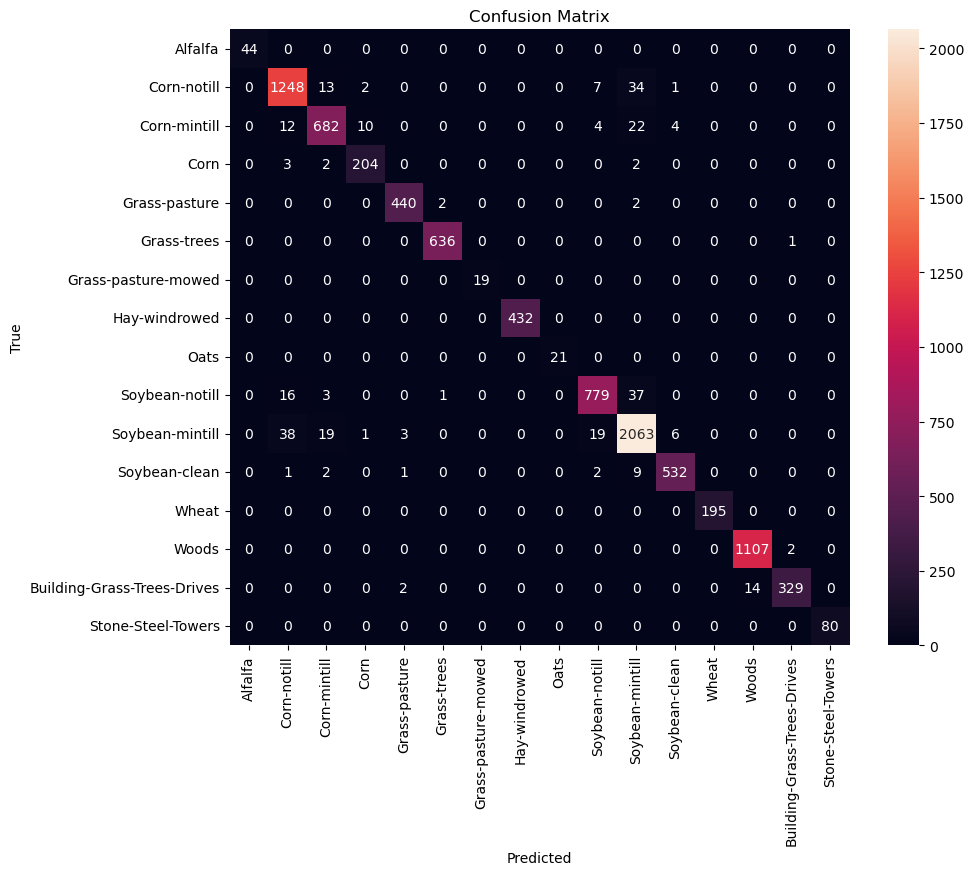

In [138]:
# confusion matrix
from sklearn.metrics import confusion_matrix

# Replace these with your actual ground truth and predicted labels
true_labels = y_test
predicted_labels = y_pred

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels (optional)
class_labels = ['Alfalfa','Corn-notill','Corn-mintill','Corn','Grass-pasture','Grass-trees','Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill',
'Soybean-mintill','Soybean-clean','Wheat','Woods','Building-Grass-Trees-Drives','Stone-Steel-Towers']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
# sns.set(font_scale=1.2)
# ns.set_style("whitegrid")
sns.heatmap(cm, annot=True, fmt="g", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ------------------------------------End-----------------------------------------

# Peformance Analysis

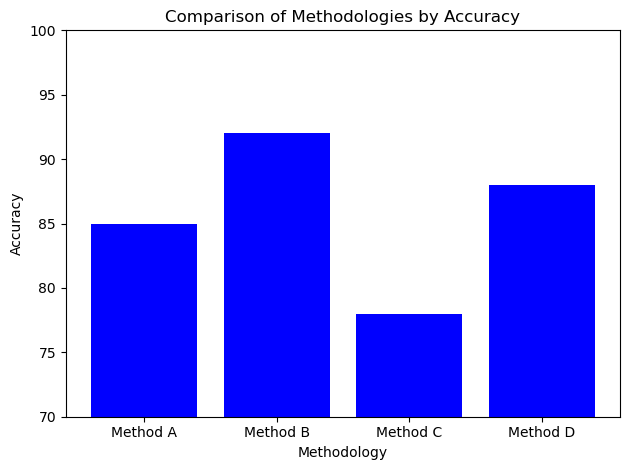

In [139]:
import matplotlib.pyplot as plt

# Methodologies and their corresponding accuracies
methodologies = ['Method A', 'Method B', 'Method C', 'Method D']
accuracies = [85, 92, 78, 88]

# Create a bar chart
plt.bar(methodologies, accuracies, color='blue')

# Add labels and title
plt.xlabel('Methodology')
plt.ylabel('Accuracy')
plt.title('Comparison of Methodologies by Accuracy')

plt.ylim(70, 100) 

# Show the bar chart
plt.tight_layout()
plt.show()

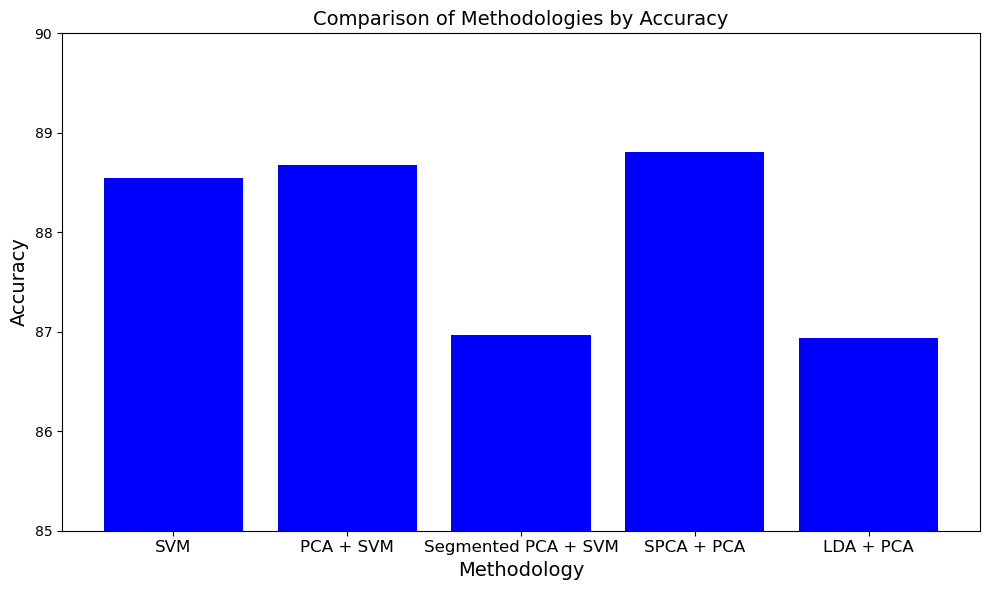

In [140]:
import matplotlib.pyplot as plt

# Methodologies and their corresponding accuracies
methodologies = ['SVM', 'PCA + SVM', 'Segmented PCA + SVM', 'SPCA + PCA', 'LDA + PCA']
accuracies = [88.55 , 88.68 , 86.97, 88.81 , 86.94]

plt.figure(figsize=(10,6))
# Create a bar chart
plt.bar(methodologies, accuracies, color='blue')

# Add labels and title
plt.xlabel('Methodology' , fontsize=14)
plt.xticks(fontsize=12)

plt.ylabel('Accuracy' , fontsize=14)
plt.title('Comparison of Methodologies by Accuracy', fontsize=14)

plt.ylim(85, 90) 

# Show the bar chart
plt.tight_layout()
plt.show()

In [141]:
sorted(y_test.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [142]:
y_test.value_counts()

11    2149
2     1305
14    1109
10     836
3      734
6      637
12     547
5      444
8      432
15     345
4      211
13     195
16      80
1       44
9       21
7       19
Name: target, dtype: int64

In [143]:
# classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred,labels=sorted(y_test.unique()))
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        44
           2       0.95      0.96      0.95      1305
           3       0.95      0.93      0.94       734
           4       0.94      0.97      0.95       211
           5       0.99      0.99      0.99       444
           6       1.00      1.00      1.00       637
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00       432
           9       1.00      1.00      1.00        21
          10       0.96      0.93      0.95       836
          11       0.95      0.96      0.96      2149
          12       0.98      0.97      0.98       547
          13       1.00      1.00      1.00       195
          14       0.99      1.00      0.99      1109
          15       0.99      0.95      0.97       345
          16       1.00      1.00      1.00        80

    accuracy                           0.97      9108
   macro avg       0.98   

In [144]:
class_accuracies = {}
class_sample_counts = {}

# Calculate per-class accuracy and sample counts
for class_label in set(y_test):
    class_indices = y_test == class_label
    class_accuracy = accuracy_score(y_test[class_indices], y_pred[class_indices])
    class_sample_count = sum(class_indices)
    class_accuracies[class_label] = class_accuracy
    class_sample_counts[class_label] = class_sample_count

# Print per-class accuracies and sample counts
print("Per-Class Accuracies and Sample Counts:")
for class_label, class_accuracy in class_accuracies.items():
    class_samples = class_sample_counts[class_label]
    print(f"Class {class_label}: Accuracy = {class_accuracy:.2f}, Samples = {class_samples}")

Per-Class Accuracies and Sample Counts:
Class 1: Accuracy = 1.00, Samples = 44
Class 2: Accuracy = 0.96, Samples = 1305
Class 3: Accuracy = 0.93, Samples = 734
Class 4: Accuracy = 0.97, Samples = 211
Class 5: Accuracy = 0.99, Samples = 444
Class 6: Accuracy = 1.00, Samples = 637
Class 7: Accuracy = 1.00, Samples = 19
Class 8: Accuracy = 1.00, Samples = 432
Class 9: Accuracy = 1.00, Samples = 21
Class 10: Accuracy = 0.93, Samples = 836
Class 11: Accuracy = 0.96, Samples = 2149
Class 12: Accuracy = 0.97, Samples = 547
Class 13: Accuracy = 1.00, Samples = 195
Class 14: Accuracy = 1.00, Samples = 1109
Class 15: Accuracy = 0.95, Samples = 345
Class 16: Accuracy = 1.00, Samples = 80
